In [1]:
import cv2
import numpy as np
import math
import pandas as pd
import PIL.Image
from matplotlib import pyplot as plt

# Read Image with Pillow

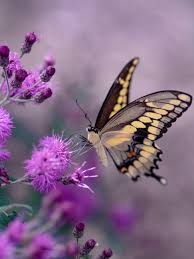

In [102]:
# pillow: read input stays in image format
ImagePIL=PIL.Image.open("C:/Users/malin/Desktop/butterfly.png")
ImagePIL

# Read Images with openCV

Image Dimensions:  (259, 194, 3)


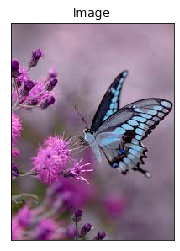

In [103]:
#openCV: read image is an array (RGB or grayscale)
ImageCV= cv2.imread("C:/Users/malin/Desktop/butterfly.png") 
print("Image Dimensions: ",ImageCV.shape)
plt.subplot(111),plt.imshow(ImageCV),plt.title('Image')
plt.xticks([]), plt.yticks([])
plt.show()

# Convert RGB to Grayscale Image with openCV

In [104]:
gray = cv2.cvtColor(ImageCV, cv2.COLOR_BGR2GRAY)
print("Image Dimension: ", gray.shape)
print("\n",gray)

Image Dimension:  (259, 194)

 [[122 122 121 ... 140 138 138]
 [122 122 121 ... 141 138 138]
 [123 123 122 ... 142 139 139]
 ...
 [ 97 101 107 ... 110 109 109]
 [ 97 101 107 ... 110 109 109]
 [ 96 100 107 ... 110 109 109]]


# Convert RGB to Grayscale Image with Pillow

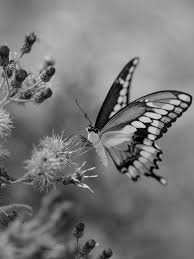

In [105]:
GrayPIL=ImagePIL.convert('L')
GrayPIL

# Convert RGB to Grayscale Image

In [106]:
# Basicaly RGB has 3 channers/dimension. Remove the last channel to get grayscale image
 
Gray=ImageCV[:,:,1]
print("Image Dimension: ", Gray.shape)
print("\n",Gray)

Image Dimension:  (259, 194)

 [[116 116 115 ... 133 131 132]
 [116 116 115 ... 133 131 132]
 [117 117 116 ... 134 132 132]
 ...
 [ 57  62  70 ... 103 102 102]
 [ 58  63  71 ... 103 102 102]
 [ 57  62  71 ... 103 102 102]]


# Save an Image with openCV 

In [107]:
cv2.imwrite('C:/Users/malin/Desktop/saveCV2.jpg',Gray)

True

# Save an Image with Pillow

In [108]:
GrayPIL.save("savePIL.jpg")

# Convert Grayscale to RGB image with openCV

In [109]:
rgbCV=cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
print(rgbCV.shape)

(259, 194, 3)


# Histograms

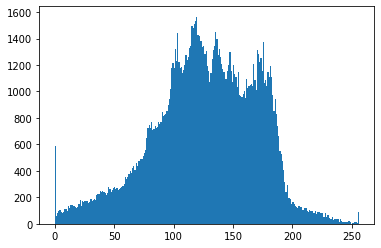

In [110]:
plt.hist(ImageCV.ravel(),256,[0,256]) 
plt.show() 

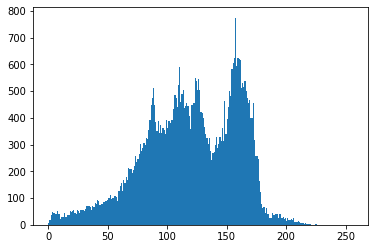

In [111]:
plt.hist(gray.ravel(),256,[0,256]) 
plt.show() 

# Upscale an Image

In [112]:
print('Original Dimensions : ',ImageCV.shape)
 
scale_percent = 150 # percent of original size
width = int(ImageCV.shape[1] * scale_percent / 100)
height = int(ImageCV.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized1 = cv2.resize(ImageCV, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized1.shape)

Original Dimensions :  (259, 194, 3)
Resized Dimensions :  (388, 291, 3)


# Downscale an Image

In [113]:
print('Original Dimensions : ',ImageCV.shape)
 
scale_percent = 50 # percent of original size
width = int(ImageCV.shape[1] * scale_percent / 100)
height = int(ImageCV.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized1 = cv2.resize(ImageCV, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized1.shape)

Original Dimensions :  (259, 194, 3)
Resized Dimensions :  (129, 97, 3)


# Blur Image with openCV

# -- Blur/Averaging

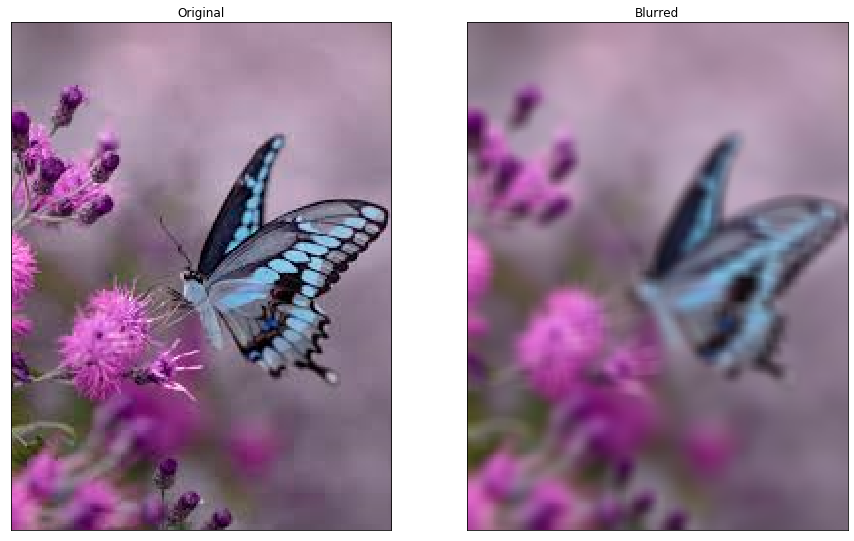

In [114]:
blur = cv2.blur(ImageCV,(7,7))
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(ImageCV),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# -- Gaussian Blur

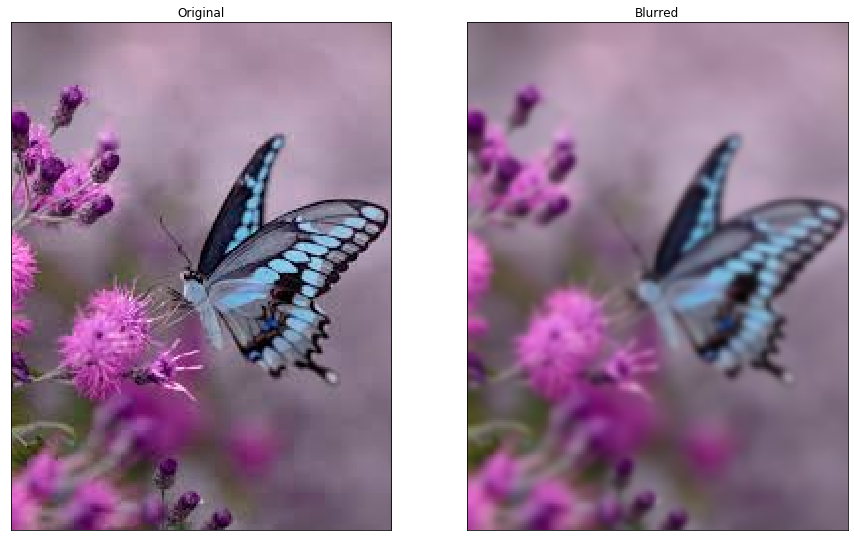

In [115]:
blur = cv2.GaussianBlur(ImageCV,(7,7),0)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(ImageCV),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# -- Median Blur

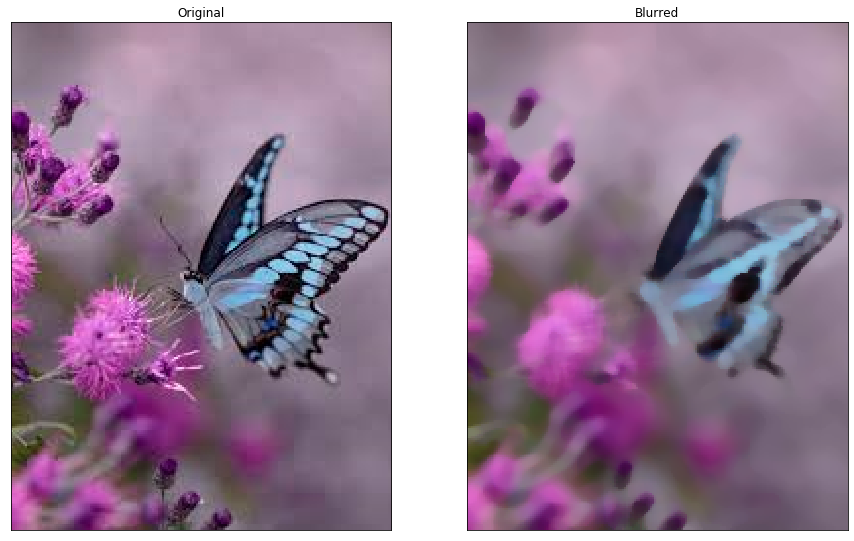

In [116]:
median = cv2.medianBlur(ImageCV,7)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(ImageCV),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# -- Bilateral Blur

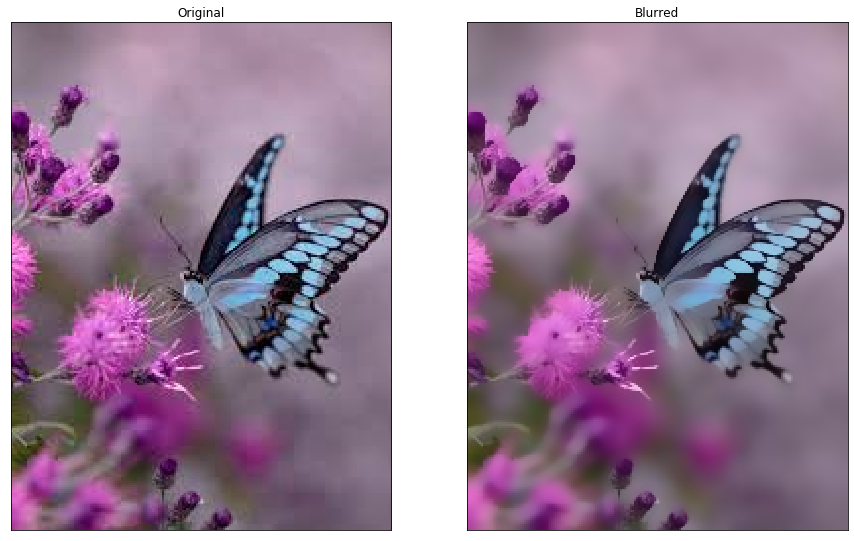

In [117]:
blur = cv2.bilateralFilter(ImageCV,9,75,75)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(ImageCV),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# Edge Detectors

# -- Canny Edge Detector

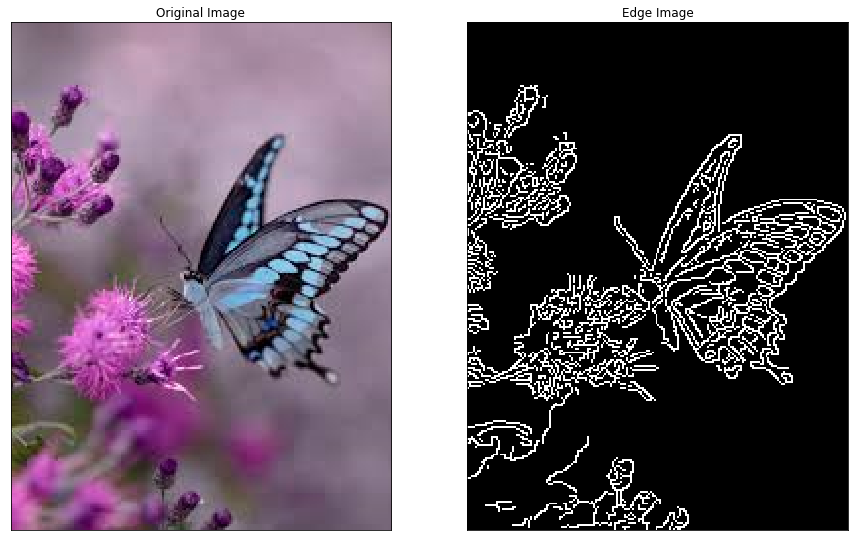

In [118]:
edges = cv2.Canny(ImageCV,100,200)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(ImageCV,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# -- Prewitt Edge Detector

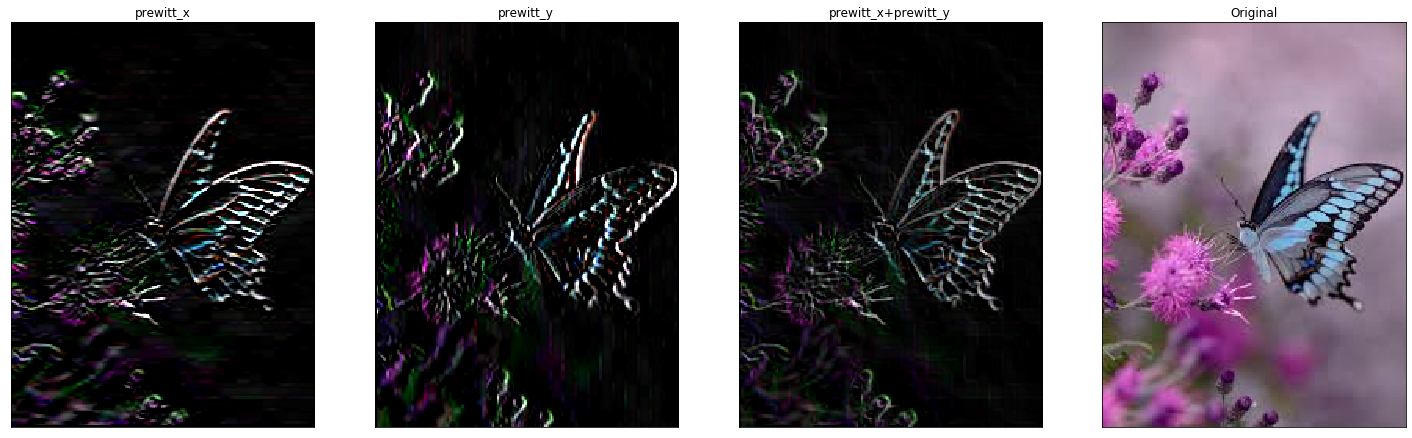

In [119]:
#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

prewittx = cv2.filter2D(ImageCV, -1, kernelx)
prewitty = cv2.filter2D(ImageCV, -1, kernely)

combine = cv2.addWeighted(np.absolute(prewittx), 0.5, np.absolute(prewitty), 0.5, 0)

plt.figure(figsize=(25,25))
plt.subplot(141),plt.imshow(prewittx,cmap = 'gray')
plt.title('prewitt_x'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(prewitty,cmap = 'gray')
plt.title('prewitt_y'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(combine,cmap = 'gray')
plt.title('prewitt_x+prewitt_y'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(ImageCV,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

# -- Sobel Edge Detector

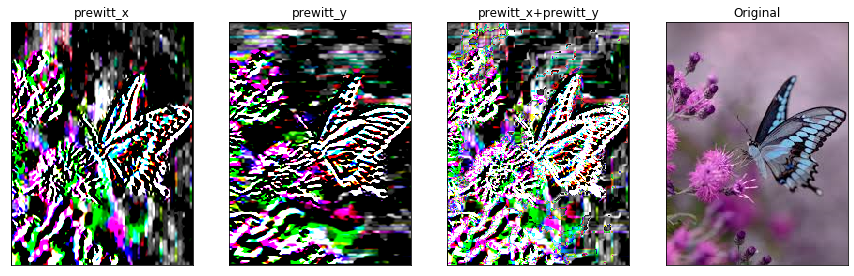

In [120]:
#sobel 

sobelx = cv2.Sobel(ImageCV,cv2.CV_8U,1,0,ksize=5)
sobely = cv2.Sobel(ImageCV,cv2.CV_8U,0,1,ksize=5)

sobel = sobelx + sobely

plt.figure(figsize=(15,15))
plt.subplot(141),plt.imshow(sobelx,cmap = 'gray')
plt.title('prewitt_x'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(sobely,cmap = 'gray')
plt.title('prewitt_y'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(sobel,cmap = 'gray')
plt.title('prewitt_x+prewitt_y'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(ImageCV,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

# -- Sobel Edge Detector with Grayscale

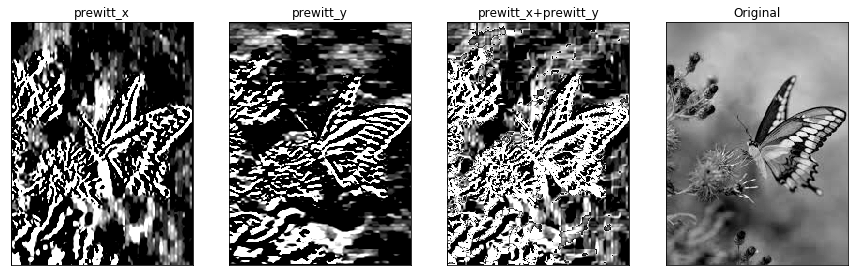

In [121]:
sobelx = cv2.Sobel(Gray,cv2.CV_8U,1,0,ksize=5)
sobely = cv2.Sobel(Gray,cv2.CV_8U,0,1,ksize=5)

sobel = sobelx + sobely

plt.figure(figsize=(15,15))
plt.subplot(141),plt.imshow(sobelx,cmap = 'gray')
plt.title('prewitt_x'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(sobely,cmap = 'gray')
plt.title('prewitt_y'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(sobel,cmap = 'gray')
plt.title('prewitt_x+prewitt_y'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(Gray,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

# -- Sobel Edge Detector with Grayscale & Smoothing

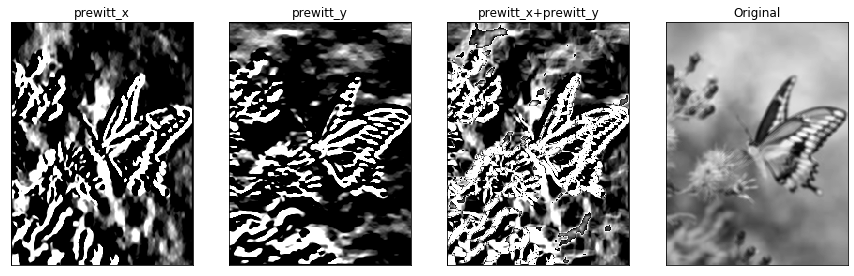

In [128]:
blur = cv2.bilateralFilter(gray,5,715,715)

sobelx = cv2.Sobel(blur,cv2.CV_8U,1,0,ksize=5)
sobely = cv2.Sobel(blur,cv2.CV_8U,0,1,ksize=5)

sobel = (sobelx + sobely) 

plt.figure(figsize=(15,15))
plt.subplot(141),plt.imshow(sobelx,cmap = 'gray')
plt.title('prewitt_x'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(sobely,cmap = 'gray')
plt.title('prewitt_y'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(sobel,cmap = 'gray')
plt.title('prewitt_x+prewitt_y'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(blur,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

# Contour Detection

Image Dimensions:  (840, 1600, 3)


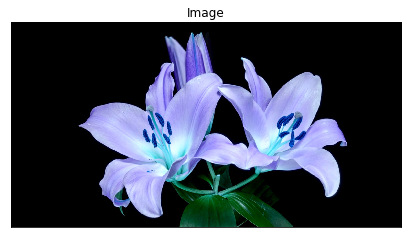

In [129]:
#openCV: read image is an array (RGB or grayscale)
ImageCV= cv2.imread("C:/Users/malin/Desktop/f.png") 
print("Image Dimensions: ",ImageCV.shape)
plt.figure(figsize=(7,7))
plt.subplot(111),plt.imshow(ImageCV),plt.title('Image')
plt.xticks([]), plt.yticks([])
plt.show()

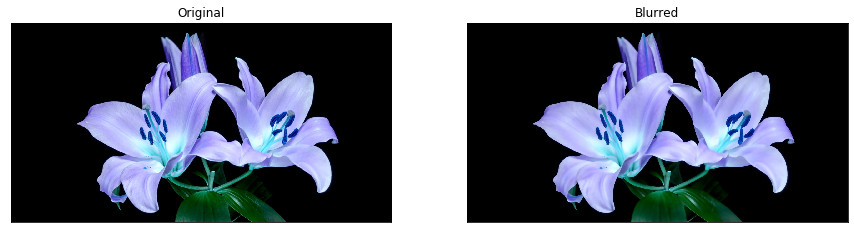

In [130]:
blur = cv2.bilateralFilter(ImageCV,9,75,75)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(ImageCV),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

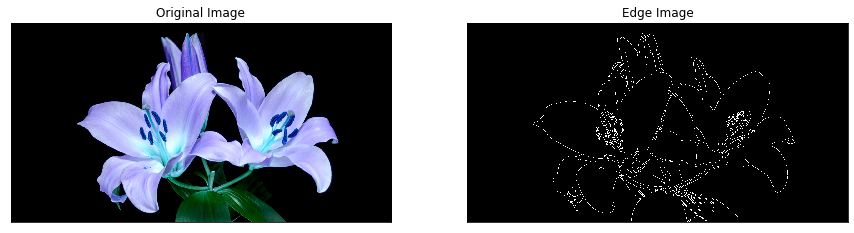

In [131]:
edges = cv2.Canny(ImageCV,100,200)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(ImageCV,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

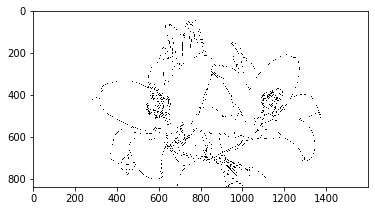

In [132]:
_, binary = cv2.threshold(edges, 225, 255, cv2.THRESH_BINARY_INV)  #I used edges from edge detector to get good contour
plt.imshow(binary, cmap="gray")
plt.show()

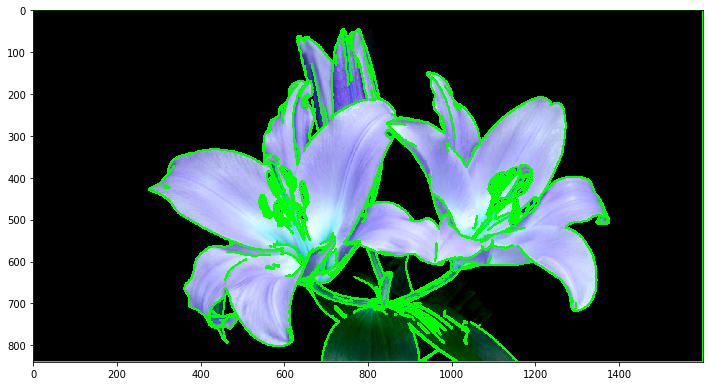

In [133]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(ImageCV, contours, -1, (0, 255, 0), 2)
# show the image with the drawn contours
plt.figure(figsize=(12,12))
plt.imshow(image)
plt.show()